**I Conduct EDA(Explanatory Data Analysis) (25 points)**
1. Dataset overview
    - Exploring summary statistics of variables
    - Exploring NAs
2. Going deeper by examining each variable individually
    - Visualisation of each variable 
    - Outlier detection
3. Exploring the interaction of two or more variables
    - Visualisation techniques
    - Correlation matrices

**Handle Outliers and Missing values. Explain your decision (25 Points)**

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor

%matplotlib inline

In [2]:
filename = os.path.join(os.path.expanduser("~"), "Downloads", "winequality.csv")
df = pd.read_csv(filename, encoding='unicode_escape', index_col='index')

### Dataset overview

In [3]:
df.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality_y'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
index,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality_y             1500 non-null   float64
dtypes: float64(12)
memory usage: 162.4 KB


# Wine Quality Dataset - Feature Summary

## 1. Fixed Acidity
- Measures **non-volatile acids** (e.g., tartaric acid).
- Higher values = **stronger acidity, more crispness**.
- Extreme values = **too sour or flat wine**.

## 2. Volatile Acidity
- Measures **evaporative acids** (mainly acetic acid).
- High values = **vinegar-like taste, spoilage risk**.
- Ideal wines have **balanced volatile acidity**.

## 3. Citric Acid
- Adds **freshness and complexity** to wine.
- Low values = **flat-tasting wine**.
- Moderate levels contribute to **liveliness**.

## 4. Residual Sugar
- **Leftover sugar** after fermentation.
- Low values = **dry wine**.
- High values = **sweet wine (common in dessert wines)**.

## 5. Chlorides
- Measures **salt content** in wine.
- High levels = **salty taste** (undesirable).
- Extremely high values = **poor winemaking or contamination**.

## 6. Free Sulfur Dioxide (SO₂)
- **Unbound SO₂** that acts as a preservative.
- Too much = **irritation, chemical taste**.
- Low levels = **risk of bacterial spoilage**.

## 7. Total Sulfur Dioxide (SO₂)
- **Total SO₂** (both free & bound) in wine.
- Helps in **preservation** but excess **affects flavor negatively**.

## 8. Density
- **Mass per unit volume** of the wine.
- Influenced by **sugar and alcohol content**.
- Higher density = **sweeter wine**, lower = **lighter wine**.

## 9. pH
- Measures **acidity/basicity** of wine.
- Low pH (<3.0) = **high acidity**.
- High pH (>4.0) = **flat, less crisp wine**.
- Wine pH usually ranges **between 3.0 - 4.0**.

## 10. Sulphates
- Acts as an **antioxidant and antimicrobial agent**.
- Moderate levels = **freshness preservation**.
- Excess = **harsh, chemical taste**.

## 11. Alcohol
- **Ethanol content (% by volume)**.
- Higher alcohol = **fuller body, warmth**.
- Lower alcohol = **lighter, thinner wine**.

---
### 🔍 **Key Takeaways**
- **Acidity (fixed, volatile, pH)** impacts **sharpness and smoothness**.
- **Sugar & density** determine if wine is **dry or sweet**.
- **Sulfur compounds** aid **preservation** but affect taste.
- **Alcohol** contributes to **body, warmth, and balance**.


In [7]:
for i in df.columns[:11]:
    df[i] = df[i].astype('float16')

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float16
 1   volatile acidity      1599 non-null   float16
 2   citric acid           1599 non-null   float16
 3   residual sugar        1599 non-null   float16
 4   chlorides             1599 non-null   float16
 5   free sulfur dioxide   1599 non-null   float16
 6   total sulfur dioxide  1599 non-null   float16
 7   density               1599 non-null   float16
 8   pH                    1599 non-null   float16
 9   sulphates             1599 non-null   float16
 10  alcohol               1599 non-null   float16
 11  quality_y             1500 non-null   float64
dtypes: float16(11), float64(1)
memory usage: 59.3 KB


In [9]:
summary_stat = df.describe()

C:\Users\anile\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [10]:
summary_stat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000,1599.000000,1599.000000,1500.000000
mean,8.320312,0.527832,0.270996,2.539062,0.087463,15.867188,inf,0.997070,3.312500,0.657715,10.429688,5.635333
std,1.741211,0.179077,0.194824,1.410156,0.047089,10.460938,32.90625,0.001891,0.154419,0.169556,1.065430,0.800903
min,4.601562,0.119995,0.000000,0.899902,0.012001,1.000000,6.00000,0.990234,2.740234,0.330078,8.398438,3.000000
25%,7.101562,0.389893,0.090027,1.900391,0.070007,7.000000,22.00000,0.995605,3.210938,0.549805,9.500000,5.000000
50%,7.898438,0.520020,0.260010,2.199219,0.078979,14.000000,38.00000,0.996582,3.310547,0.620117,10.203125,6.000000
75%,9.203125,0.640137,0.419922,2.599609,0.090027,21.000000,62.00000,0.998047,3.400391,0.729980,11.101562,6.000000
max,15.898438,1.580078,1.000000,15.500000,0.610840,72.000000,289.00000,1.003906,4.011719,2.000000,14.898438,8.000000


In terms of the distribution's normality, we can check whether the median is close to or equal to the mean. In most cases, yes. However, given the spread between quantiles, the distribution might not be normal, or there could be outliers.

Regarding the quality_y, based on the Kaggle research, it includes a score between 0 and 10.

In [11]:
df.isna().sum() / df.shape[0] * 100

fixed acidity           0.00000
volatile acidity        0.00000
citric acid             0.00000
residual sugar          0.00000
chlorides               0.00000
free sulfur dioxide     0.00000
total sulfur dioxide    0.00000
density                 0.00000
pH                      0.00000
sulphates               0.00000
alcohol                 0.00000
quality_y               6.19137
dtype: float64

The portion of NAs in the whole dataset is 6.19%, so my decision would be to either fill it with some technique or drop the missing rows. As we are just exploring the dataset and not building any ML models, I cannot judge which is a better option at the moment. I decided to fill the NAs with the KNN because I assume that the other features contribute to wine quality.

In [12]:
df['quality_y'].value_counts()

quality_y
5.0    646
6.0    597
7.0    186
4.0     46
8.0     16
3.0      9
Name: count, dtype: int64

In [13]:
imputer = KNNImputer(n_neighbors=5)
df.iloc[:, :] = imputer.fit_transform(df)

In [14]:
df['quality_y'] = df['quality_y'].astype('int8')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float16
 1   volatile acidity      1599 non-null   float16
 2   citric acid           1599 non-null   float16
 3   residual sugar        1599 non-null   float16
 4   chlorides             1599 non-null   float16
 5   free sulfur dioxide   1599 non-null   float16
 6   total sulfur dioxide  1599 non-null   float16
 7   density               1599 non-null   float16
 8   pH                    1599 non-null   float16
 9   sulphates             1599 non-null   float16
 10  alcohol               1599 non-null   float16
 11  quality_y             1599 non-null   int8   
dtypes: float16(11), int8(1)
memory usage: 48.4 KB


In [16]:
summary_stat_upd = df.describe()

C:\Users\anile\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [17]:
summary_stat_upd

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.320312,0.527832,0.270996,2.539062,0.087463,15.867188,inf,0.997070,3.312500,0.657715,10.429688,5.614134
std,1.741211,0.179077,0.194824,1.410156,0.047089,10.460938,32.90625,0.001891,0.154419,0.169556,1.065430,0.790637
min,4.601562,0.119995,0.000000,0.899902,0.012001,1.000000,6.00000,0.990234,2.740234,0.330078,8.398438,3.000000
25%,7.101562,0.389893,0.090027,1.900391,0.070007,7.000000,22.00000,0.995605,3.210938,0.549805,9.500000,5.000000
50%,7.898438,0.520020,0.260010,2.199219,0.078979,14.000000,38.00000,0.996582,3.310547,0.620117,10.203125,6.000000
75%,9.203125,0.640137,0.419922,2.599609,0.090027,21.000000,62.00000,0.998047,3.400391,0.729980,11.101562,6.000000
max,15.898438,1.580078,1.000000,15.500000,0.610840,72.000000,289.00000,1.003906,4.011719,2.000000,14.898438,8.000000


In [18]:
summary_stat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000,1599.000000,1599.000000,1500.000000
mean,8.320312,0.527832,0.270996,2.539062,0.087463,15.867188,inf,0.997070,3.312500,0.657715,10.429688,5.635333
std,1.741211,0.179077,0.194824,1.410156,0.047089,10.460938,32.90625,0.001891,0.154419,0.169556,1.065430,0.800903
min,4.601562,0.119995,0.000000,0.899902,0.012001,1.000000,6.00000,0.990234,2.740234,0.330078,8.398438,3.000000
25%,7.101562,0.389893,0.090027,1.900391,0.070007,7.000000,22.00000,0.995605,3.210938,0.549805,9.500000,5.000000
50%,7.898438,0.520020,0.260010,2.199219,0.078979,14.000000,38.00000,0.996582,3.310547,0.620117,10.203125,6.000000
75%,9.203125,0.640137,0.419922,2.599609,0.090027,21.000000,62.00000,0.998047,3.400391,0.729980,11.101562,6.000000
max,15.898438,1.580078,1.000000,15.500000,0.610840,72.000000,289.00000,1.003906,4.011719,2.000000,14.898438,8.000000


After filling the NAs with the KNN technique, we can see that we have not impacted the quality_y summary_stat much.

### Going deeper by examining each variable individually

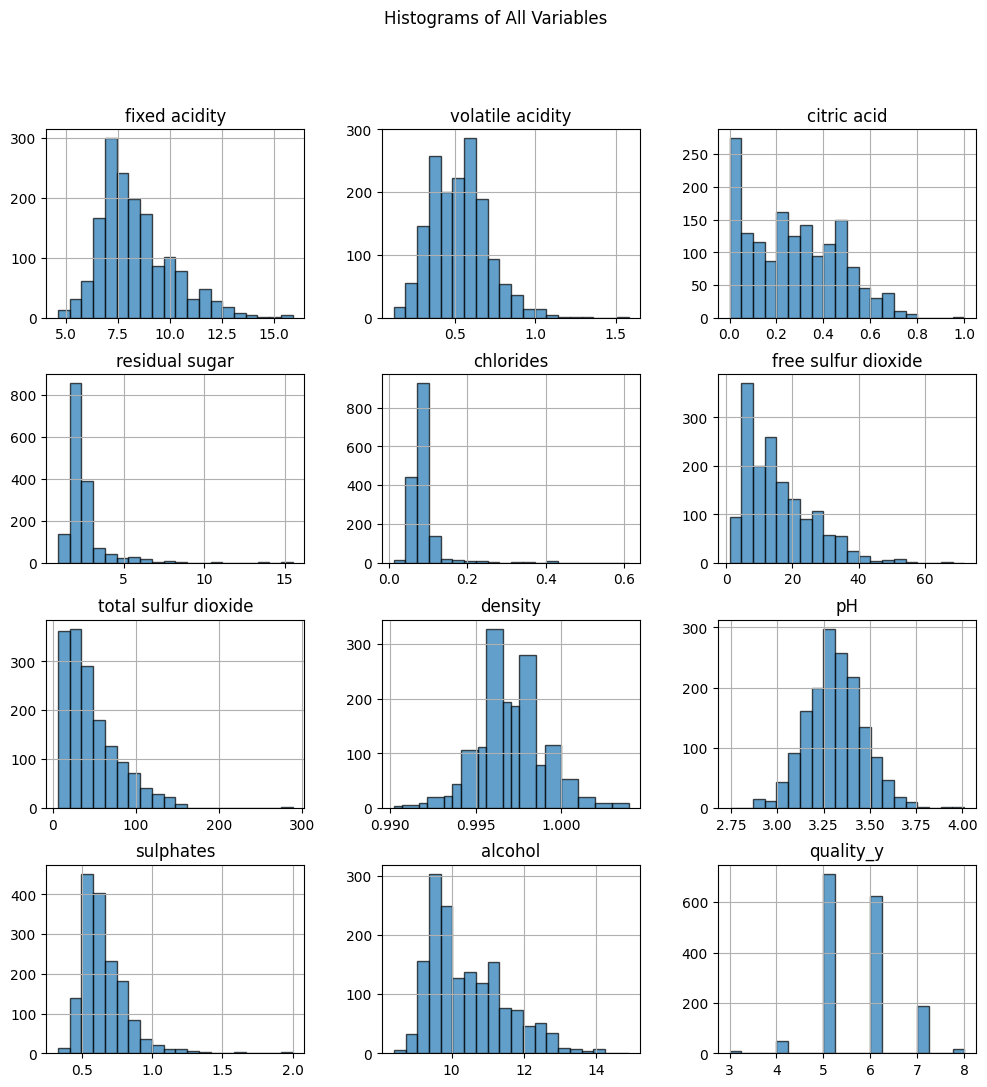

In [19]:
df.hist(figsize=(12, 12), bins=20, edgecolor='black', alpha=0.7)
plt.suptitle("Histograms of All Variables")
plt.show()

In [20]:
def boxplot(dataframe, i):
    plt.figure(figsize=(12, 6))

    sns.boxplot(data=dataframe[dataframe.columns[i]], orient='h')
    plt.xticks(rotation=90)

    plt.show()

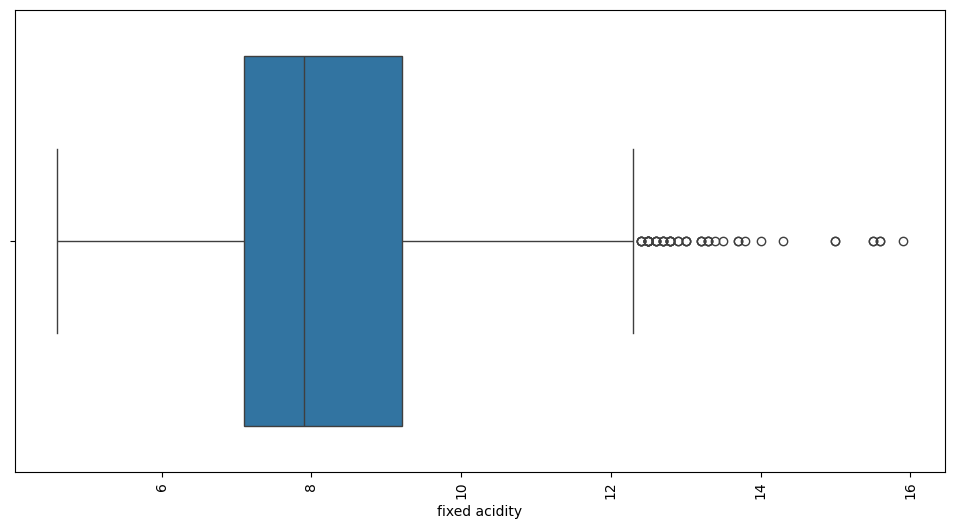

In [21]:
boxplot(df, 0)

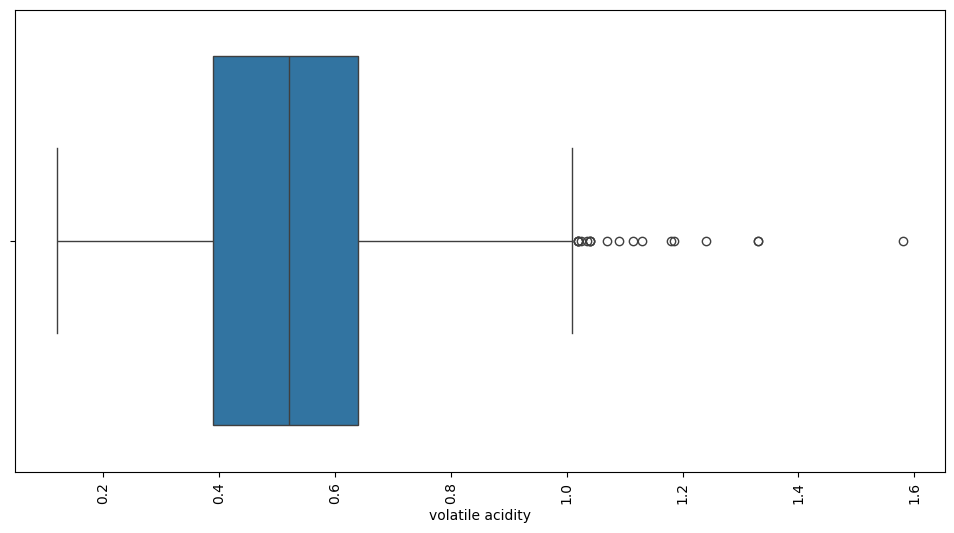

In [22]:
boxplot(df, 1)

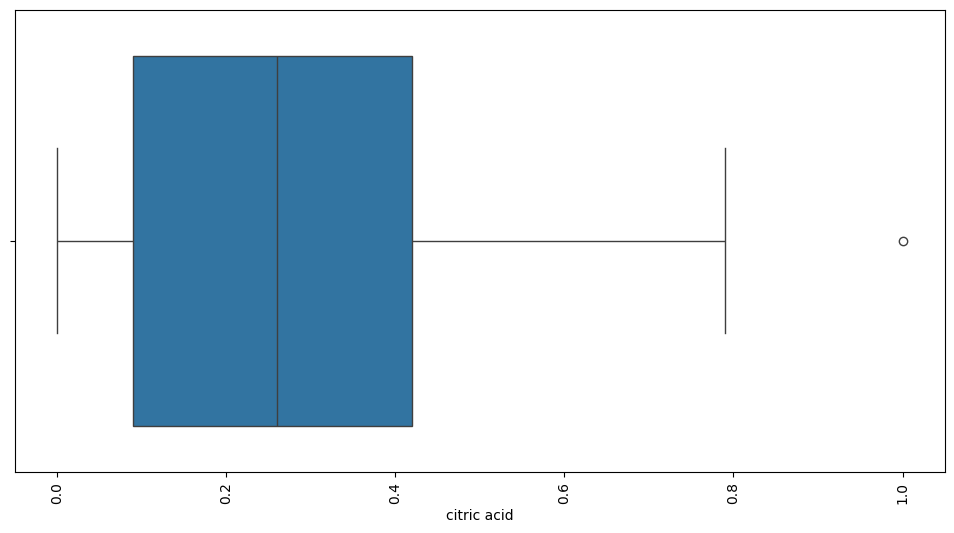

In [23]:
boxplot(df, 2)

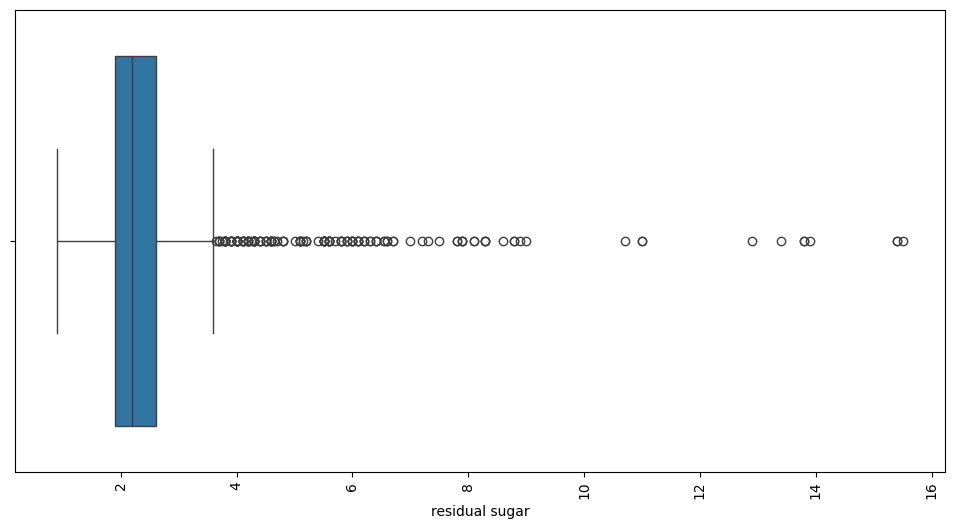

In [24]:
boxplot(df, 3)

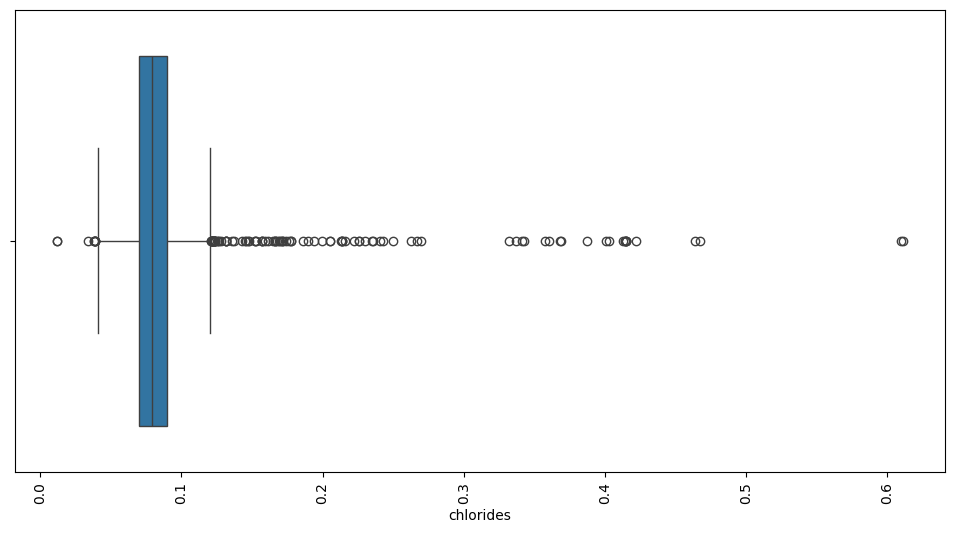

In [25]:
boxplot(df, 4)

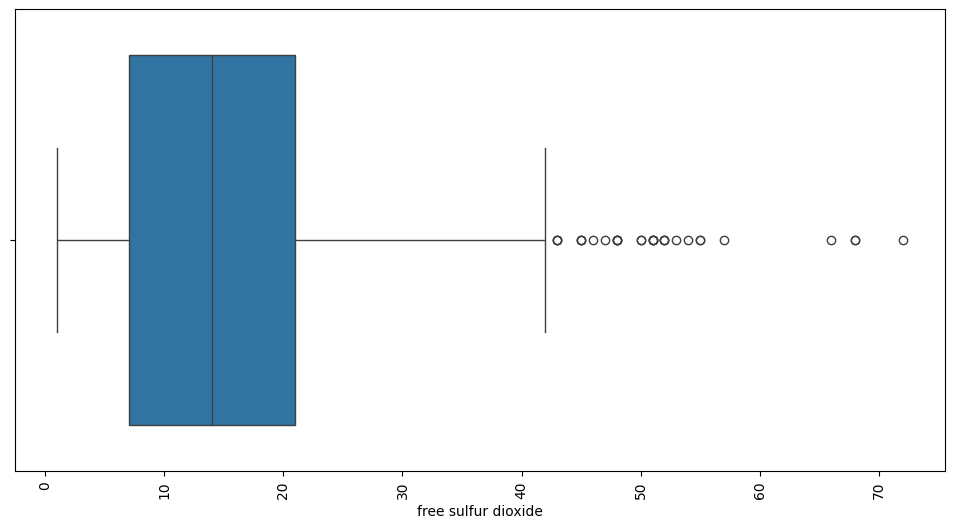

In [26]:
boxplot(df, 5)

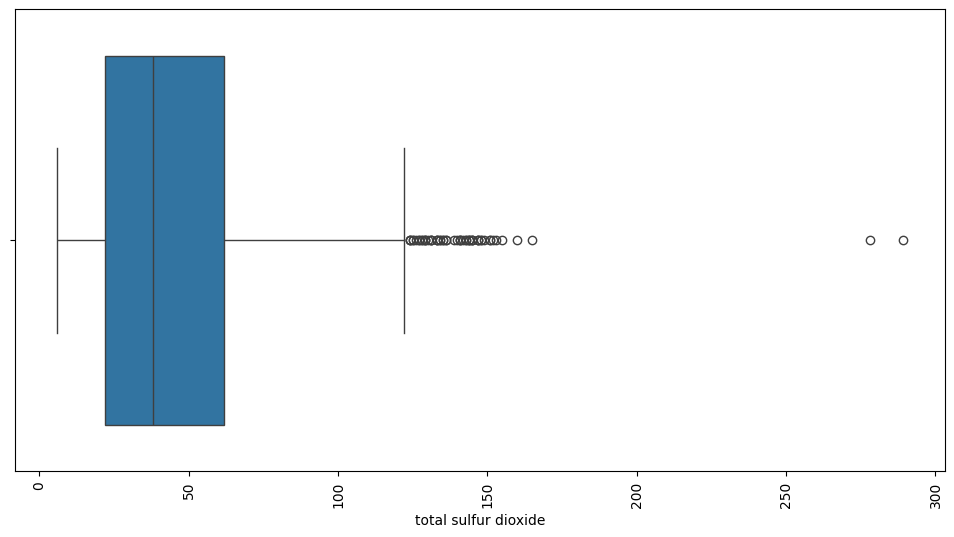

In [27]:
boxplot(df, 6)

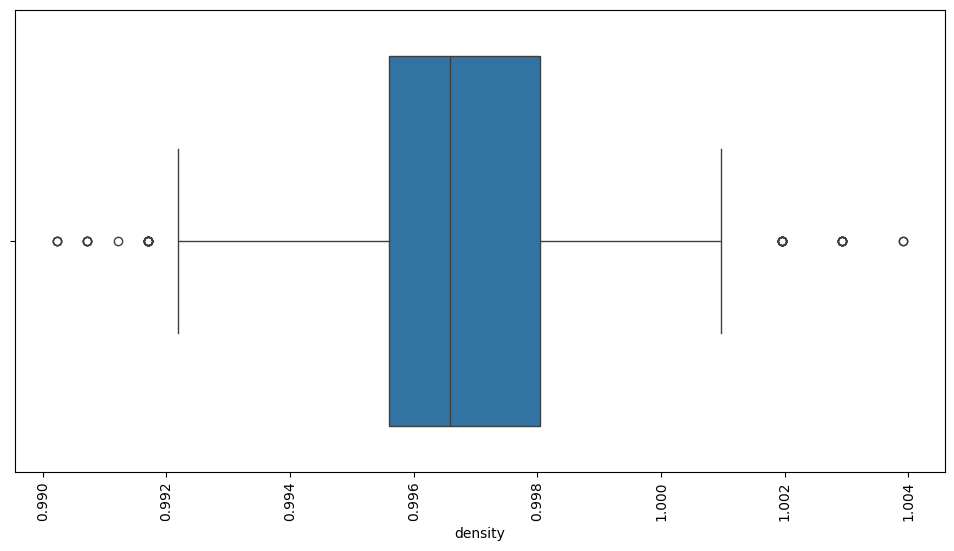

In [28]:
boxplot(df, 7)

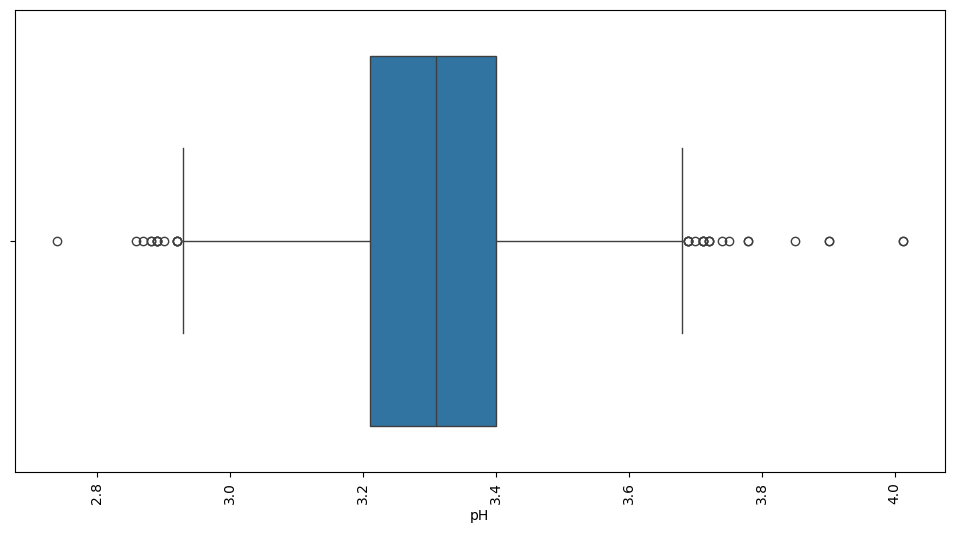

In [29]:
boxplot(df, 8)

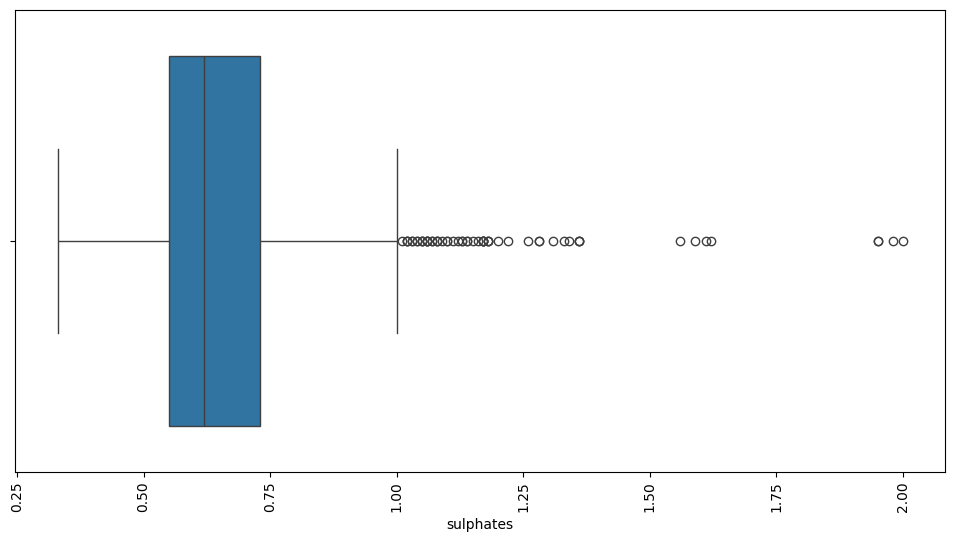

In [30]:
boxplot(df, 9)

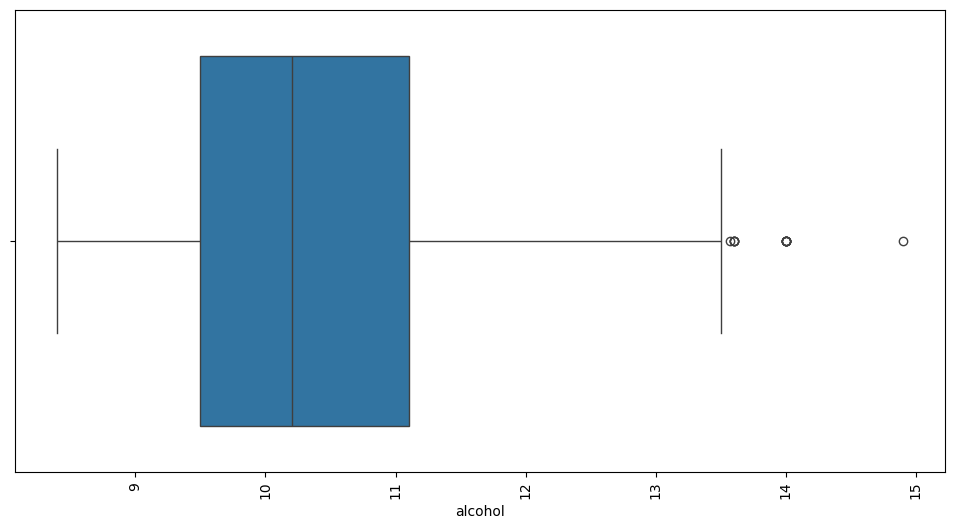

In [31]:
boxplot(df, 10)

Given that each feature has an "outlier" based on the boxplots, I asked ChatGPT to explain to me each of the features in the wine domain so I could try and understand a bit "more" about the elements, hence, make decisions if, e.g., 5 for sulfates is a norm/anomaly... At least, based on the "research," I could not see any values that are apparent anomalies in this context (e.g., the negative quantities in the classroom examples).

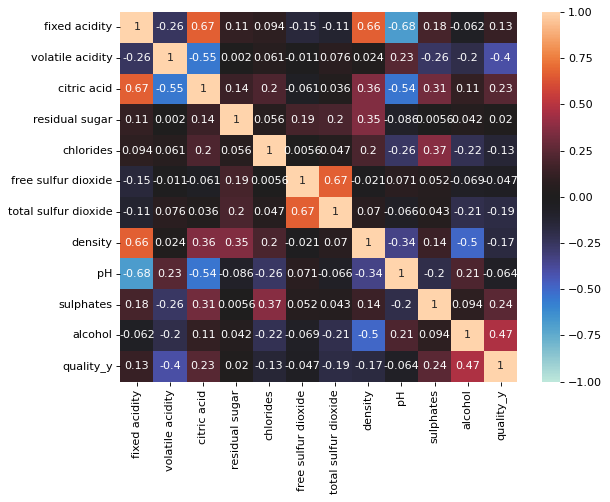

In [32]:
correlation = df.corr()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, annot=correlation)

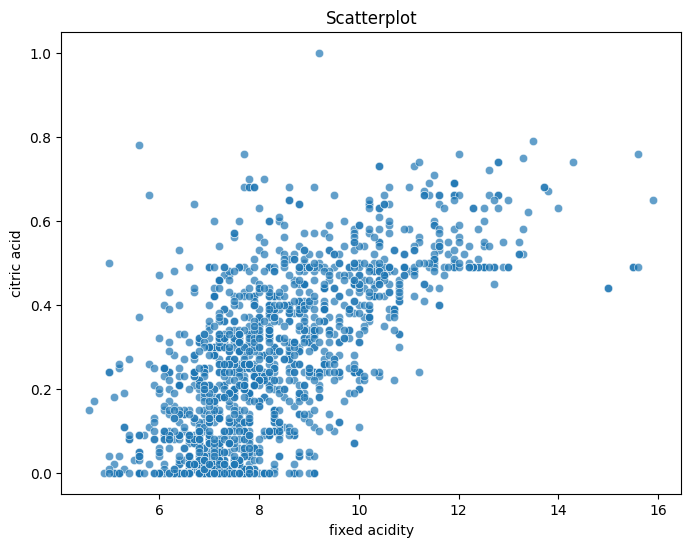

In [33]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 2], alpha=0.7)

plt.title("Scatterplot")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[2])

plt.show()

Most data points are densely concentrated between fixed acidity in the range of 6-10 g/L and citric acid in the range of 0.0-0.5 g/L.

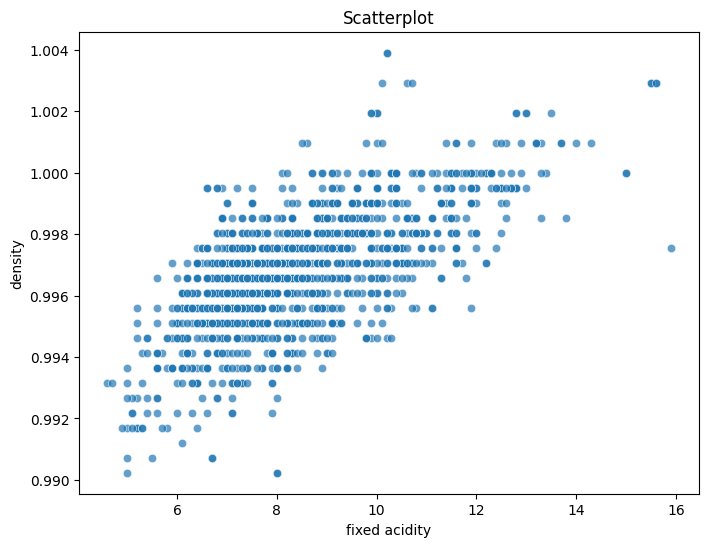

In [34]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 7], alpha=0.7)

plt.title("Scatterplot")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[7])

plt.show()

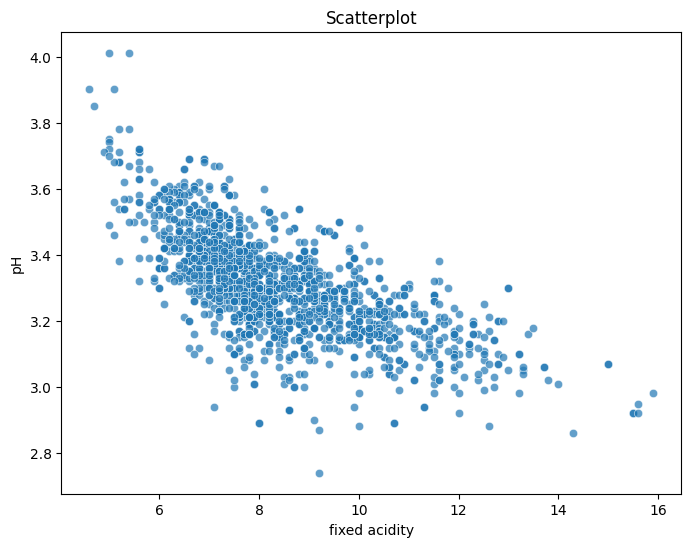

In [35]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 8], alpha=0.7)

plt.title("Scatterplot")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[8])

plt.show()

Based on the below, I tried to detect outliers based on distances of neighbors. Given that there are about 1.5k datapoints, it is hard to select number of optimal neighbors, as 5-7 may be too strict, while in case of 9 and above, there are not much outliers detected. This can be seen with boxplots as well, not much impact/movement.

In [36]:
lof = LocalOutlierFactor(n_neighbors=7)

# -1 => outlier, 1 => normal
outlier_labels = lof.fit_predict(df)

df_lof = df.copy()
df_lof['LOF_Outlier'] = outlier_labels

num_outliers = (df_lof['LOF_Outlier'] == -1).sum()
print(f"Detected {num_outliers} outliers using LOF.")

Detected 49 outliers using LOF.


In [37]:
df_lof[df_lof['LOF_Outlier'] == -1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y,LOF_Outlier
index,,,,,,,,,,,,,
18,7.398438,0.589844,0.080017,4.398438,0.085999,6.0,29.0,0.997559,3.380859,0.500000,9.000000,4,-1
35,7.800781,0.645020,0.000000,5.500000,0.085999,5.0,18.0,0.998535,3.400391,0.549805,9.601562,6,-1
45,4.601562,0.520020,0.150024,2.099609,0.053986,8.0,65.0,0.993164,3.900391,0.560059,13.101562,4,-1
57,7.500000,0.629883,0.119995,5.101562,0.111023,50.0,110.0,0.998535,3.259766,0.770020,9.398438,5,-1
267,7.898438,0.350098,0.459961,3.599609,0.078003,15.0,37.0,0.997070,3.349609,0.859863,12.796875,8,-1
324,10.000000,0.489990,0.199951,11.000000,0.070984,13.0,50.0,1.001953,3.160156,0.689941,9.203125,6,-1
325,10.000000,0.489990,0.199951,11.000000,0.070984,13.0,50.0,1.001953,3.160156,0.689941,9.203125,6,-1
354,6.101562,0.209961,0.399902,1.400391,0.065979,40.5,165.0,0.991211,3.250000,0.589844,11.898438,6,-1
378,11.398438,0.625000,0.660156,6.199219,0.088013,6.0,24.0,0.999023,3.109375,0.990234,13.296875,6,-1


In [38]:
new_df = df_lof[df_lof['LOF_Outlier'] != -1]

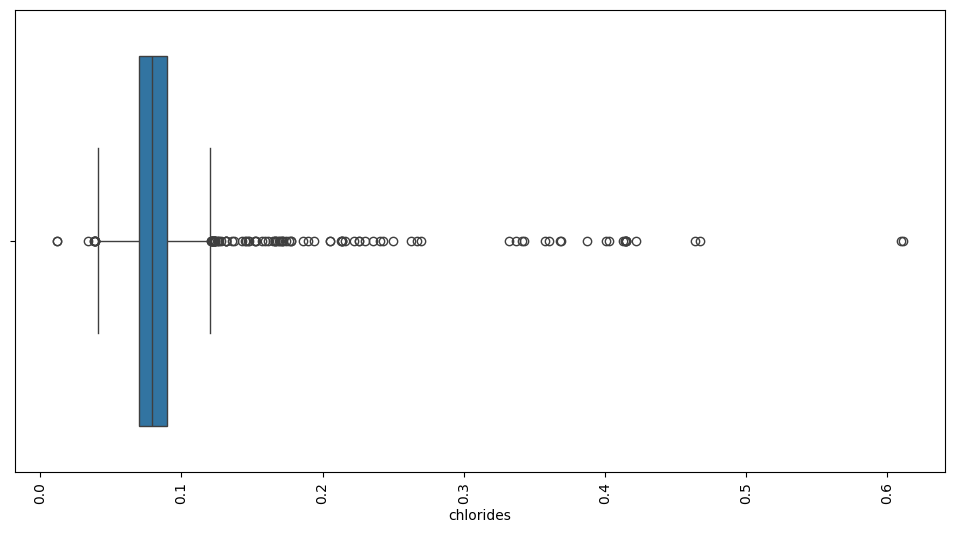

In [39]:
boxplot(new_df, 4)

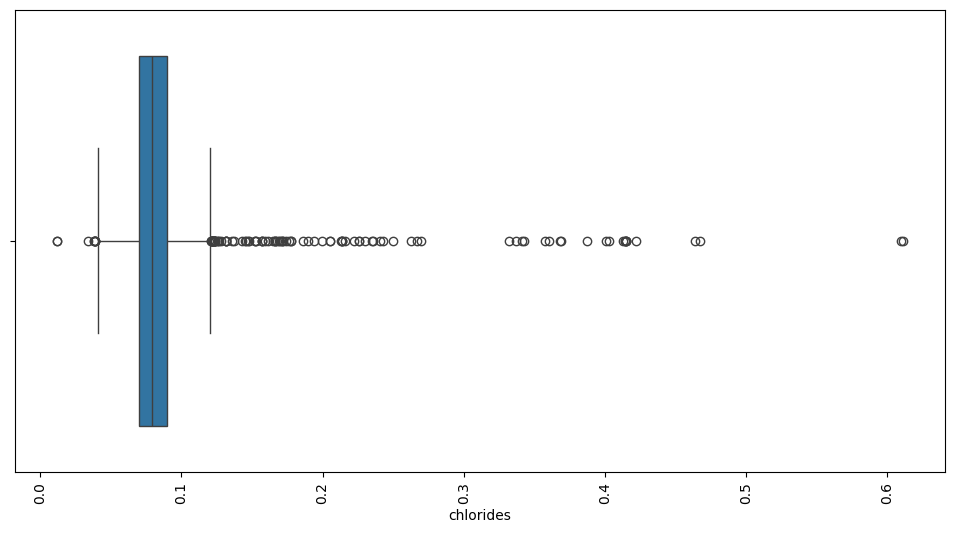

In [40]:
boxplot(df, 4)

Not much impact using IQR for any single criteria as well. And if we try going through all the features consequently, we will end up eliminating about 30% of the initial data, which is not reasonable.

In [41]:
def outlier_detection(df):
    df_clean = df
    for i in df_clean.columns:
        Q1 = df_clean[i].quantile(0.25)
        Q3 = df_clean[i].quantile(0.75)
        IQR = Q3 - Q1
        low_bound = Q1 - 1.5 * IQR
        up_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[i] >= low_bound) & (df_clean[i] <= up_bound)]
    return df_clean

In [42]:
df_clean = outlier_detection(df)
outliers = len(df) - len(df_clean)
print(f"Removed {outliers} outliers using IQR. This is {100 * (1 - len(df_clean) / len(df))}")

Removed 474 outliers using IQR. This is 29.643527204502817
